In [45]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import panel as pn
import plotly.express as px

In [46]:
#Reading Abbott Labs Stock File
abt_csv = Path("ABT.csv")

In [47]:
#Removing top header
abt_data = pd.read_csv(abt_csv, header = 1)
#removing timestamp
abt_data['Date'] = abt_data['Date'].str.split(' ',expand=True)[0]
#Rename columns / set date as index
abt_data = abt_data.rename(columns={"Close": "Abbott Laboratories"}).set_index(pd.DatetimeIndex(abt_data['Date']))
#remove duplicate date column
abt_data.drop('Date', axis=1, inplace=True)
#Display ABT stock data
abt_data.head()

,Abbott Laboratories
Date,
2020-01-02,86.95
2020-01-03,85.89
2020-01-06,86.34
2020-01-07,85.86
2020-01-08,86.21


In [48]:
#Plotting ABT
abt_plot = abt_data.hvplot(title = "Abbott Laboratories Stocks", height = 500, width = 700)
abt_plot

:Curve   [Date]   (Abbott Laboratories)

In [49]:
#Reading Moderna Labs Stock File
mrna_csv = Path("mrna.csv")

In [50]:
#Removing first header
mrna_data = pd.read_csv(mrna_csv, header = 1)
#removing timestamp
mrna_data['Date'] = mrna_data['Date'].str.split(' ',expand=True)[0]
#Rename columns
mrna_data = mrna_data.rename(columns={"Close": "Moderna"}).set_index(pd.DatetimeIndex(mrna_data['Date']))
#remove duplicate date column
mrna_data.drop('Date', axis=1, inplace=True)
#Display recults
mrna_data.head()

,Moderna
Date,
2020-01-02,19.23
2020-01-03,18.89
2020-01-06,18.13
2020-01-07,17.78
2020-01-08,17.98


In [51]:
#Plotting Moderna
mrna_plot = mrna_data.hvplot(title = "Moderna Stock Data", line_color = 'orange', height = 500, width = 700)
mrna_plot

:Curve   [Date]   (Moderna)

In [52]:
#Reading Novavax Labs Stock File
nvax_csv = Path("nvax.csv")

In [53]:
#removing first header
nvax_data = pd.read_csv(nvax_csv, header = 1)
#removing timestamp from date column
nvax_data['Date'] = nvax_data['Date'].str.split(' ',expand=True)[0]
#Rename columns and set date as index
nvax_data = nvax_data.rename(columns={"Close": "Novavax"}).set_index(pd.DatetimeIndex(nvax_data['Date']))
#remove duplicate date column
nvax_data.drop('Date', axis=1, inplace=True)
#Display recults
nvax_data.head()

,Novavax
Date,
2020-01-02,4.49
2020-01-03,4.44
2020-01-06,4.58
2020-01-07,4.57
2020-01-08,4.28


In [54]:
#Plotting Novavax
nvax_plot = nvax_data.hvplot(title = "Novavax Stock Data", line_color = 'green', height = 500, width = 700)
nvax_plot

:Curve   [Date]   (Novavax)

In [55]:
#Reading Pfizer Stock File
pfe_csv = Path("pfe.csv")

In [56]:
#removing first header
pfe_data = pd.read_csv(pfe_csv, header = 1)
#removing timestamp from date column
pfe_data['Date'] = pfe_data['Date'].str.split(' ',expand=True)[0]
#Rename columns and set date as index
pfe_data = pfe_data.rename(columns={"Close": "Pfizer"}).set_index(pd.DatetimeIndex(pfe_data['Date']))
#remove duplicate date column
pfe_data.drop('Date', axis=1, inplace=True)
#Display results
pfe_data.head()

,Pfizer
Date,
2020-01-02,39.11602
2020-01-03,38.90504
2020-01-06,38.85230
2020-01-07,38.72571
2020-01-08,39.03163


In [57]:
#Plotting Pfizer
pfe_plot = pfe_data.hvplot(title = "Pfizer Stock Data", line_color = 'purple', height = 500, width = 700)
pfe_plot

:Curve   [Date]   (Pfizer)

In [58]:
#Concatenate data
vax_data = pd.concat([abt_data , mrna_data, nvax_data, pfe_data], axis='columns', join='inner')
vax_data.head()

,Abbott Laboratories,Moderna,Novavax,Pfizer
Date,,,,
2020-01-02,86.95,19.23,4.49,39.11602
2020-01-03,85.89,18.89,4.44,38.90504
2020-01-06,86.34,18.13,4.58,38.85230
2020-01-07,85.86,17.78,4.57,38.72571
2020-01-08,86.21,17.98,4.28,39.03163


In [59]:
#Plotting concatenated data
vx = vax_data.hvplot(title = "Stock Data for Pharma",height = 500, width = 700)
vx

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [60]:
#Plotting with tabs
tabs = pn.Tabs(
    ("All Vaccines", vx),
    ("Abbott Laboratories", abt_plot),
    ("Moderna", mrna_plot),
    ("Novavax", nvax_plot),
    ("Pfizer", pfe_plot)
)
    
tabs

Tabs
    [0] HoloViews(NdOverlay, name='All Vaccines')
    [1] HoloViews(Curve, name='Abbott Laboratories')
    [2] HoloViews(Curve, name='Moderna')
    [3] HoloViews(Curve, name='Novavax')
    [4] HoloViews(Curve, name='Pfizer')

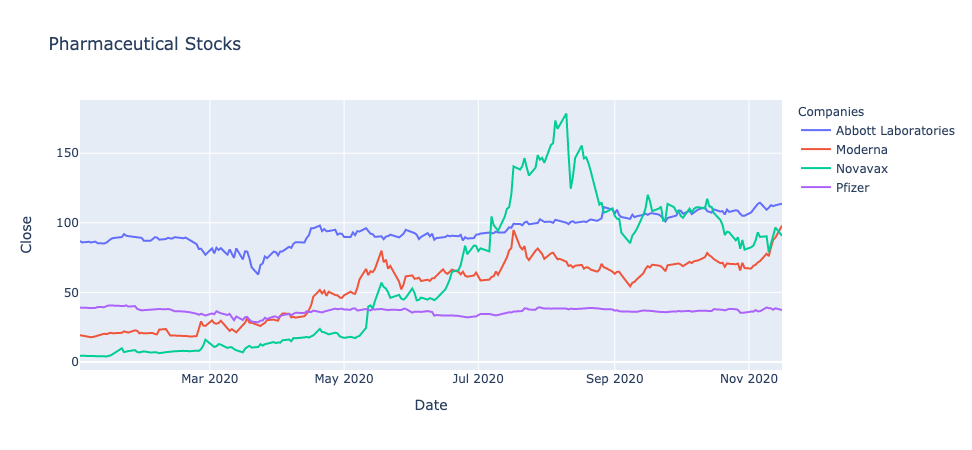

In [62]:
#plotly version

vax_px = px.line(vax_data ,y = ['Abbott Laboratories','Moderna','Novavax','Pfizer',], labels = {'value':'Close',
                "variable": "Companies"}, title="Pharmaceutical Stocks")
vax_px.show()
